In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates

import missingno as miss

import seaborn as sns
import numpy as np

import datetime as dt

In [2]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df = pd.read_csv(url)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# Convert the "date" column to datetime format
df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')

# selecting data for the year 2000 and beyond
df = df[df['date'].dt.year >= 2000]
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
7670,2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
7671,2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
7672,2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
7673,2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
7674,2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


In [4]:
# Set the date column as the index.

df_ts = df.set_index('date')
df_ts

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [5]:
df_ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

# Filter out only the required data

In [6]:
# Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth

df_ts=df_ts.drop(columns=['cloud_cover', 'sunshine', 'global_radiation', 'pressure'])

df_ts


,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0
...,...,...,...,...,...
2020-12-27,7.5,7.5,7.6,2.0,NaN
2020-12-28,3.6,1.1,-1.3,0.2,NaN
2020-12-29,4.1,2.6,1.1,0.0,NaN


In [7]:
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   precipitation  7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


In [8]:
df_ts.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [9]:
# Creating filters to fill for temps

temp_fill = ['mean_temp', 'max_temp', 'min_temp']
df[temp_fill] = df[temp_fill].ffill()

In [10]:
# For snow_depth and percipitation

df_ts = df_ts.fillna(0)

In [11]:
df_ts.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

In [12]:
# check the index to confirm its datetime
df_ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

# Part 2

## What month had the most precipitation between 2000 through 2010?

In [22]:
# Create DataFrame with precipitation resampled to calendar month freq
df_month = df_ts['precipitation'].resample('M').sum()

In [23]:
# Set time from 2000 to 2010
start_date = '2000-01-01'
end_date = '2010-12-31'
df_month_per = df_month.loc[start_date:end_date]

In [24]:
# Find the date & value for the max precipitation
max_precipitation_date = df_month_per.idxmax()
max_precipitation_value = df_month_per.max()

In [25]:
def format_xdates_stocks(ax):
    
    # Create a year locator
    loc_major_yr = mdates.YearLocator()
    # Create a year formatter using 4-digit years
    fmt_major_yr = mdates.DateFormatter("%Y")


    # Create a month locator that will add months at 1,4,7,10
    loc_minor_3m = mdates.MonthLocator(bymonth=[1,4,7,10])
    # Createa monthnformatter that will use 3-letter month names
    fmt_minor_3m = mdates.DateFormatter("%b")
    

    
    # Set xaxis major locator/formatter
    ax.xaxis.set_major_locator(loc_major_yr)
    ax.xaxis.set_major_formatter(fmt_major_yr)


    # Set xaxis minor locator/formatter
    ax.xaxis.set_minor_locator(loc_minor_3m)
    ax.xaxis.set_minor_formatter(fmt_minor_3m)

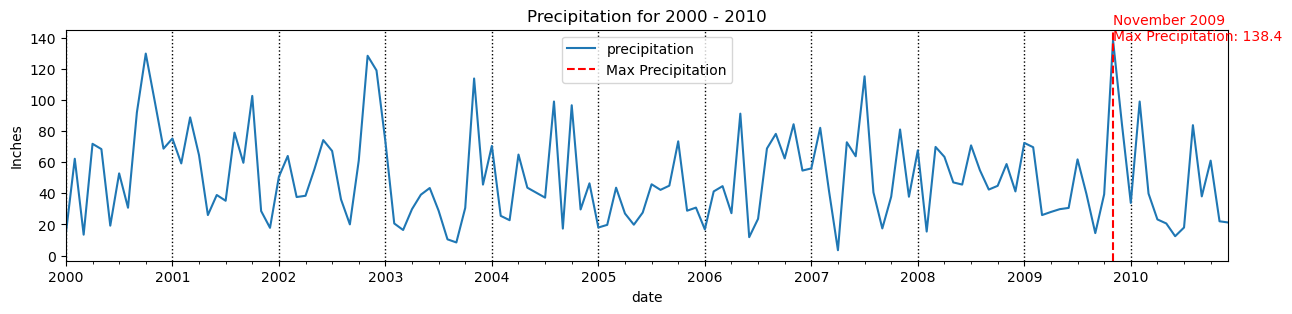

In [26]:
fig, ax = plt.subplots(figsize=(15,3))
df_month_per.plot(ax=ax)
## Create our plot and save the ax
ax.set(ylabel="Inches", title='Precipitation for 2000 - 2010')

# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

# Add vertical line at the date with maximum precipitation
plt.axvline(x=max_precipitation_date, color='r', linestyle='--', label='Max Precipitation')
plt.text(max_precipitation_date, max_precipitation_value,
         f"{max_precipitation_date.strftime('%B %Y')}\nMax Precipitation: {max_precipitation_value}", color='r')

plt.legend()
plt.show()

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

According to the chart above it indicates that Nov. 2009 was the month with the highest recorded precipitation.

## Which year between 2000-2020 had the coolest average temperature?

In [27]:
# Resample the data as yearly freq
df_year = df_ts.mean_temp.resample('Y').mean()

# Determine the date and value for the lowest mean temp
min_temp_date = df_year.idxmin()
min_temp_value = df_year.min()

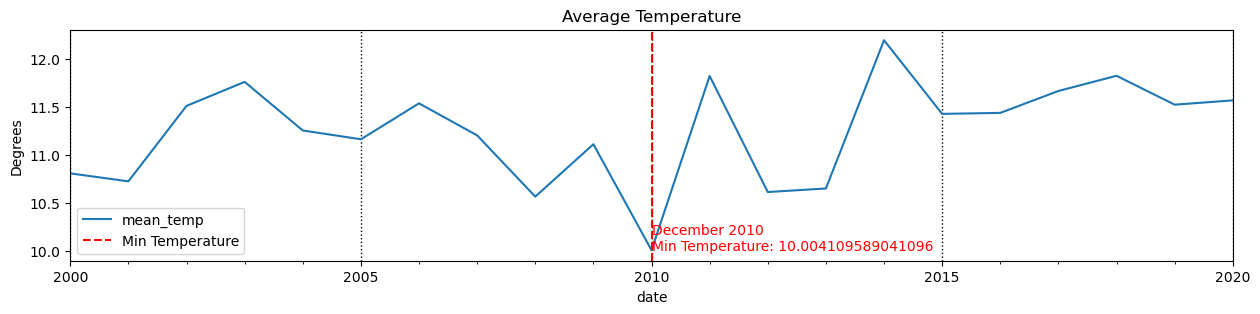

In [28]:
fig, ax = plt.subplots(figsize=(15,3))
df_year.plot(ax=ax)

## Create our plot and save the ax
ax.set(ylabel="Degrees", title='Average Temperature')

# Add gridlines for major xaxis ticks
ax.grid(which='major',axis='x',color='k',ls=':',lw=1)

# Add vertical line at the date with maximum precipitation
plt.axvline(x=min_temp_date, color='r', linestyle='--', label='Min Temperature')
plt.text(min_temp_date, min_temp_value,
         f"{min_temp_date.strftime('%B %Y')}\nMin Temperature: {min_temp_value}", color='r')

plt.legend()
plt.show()

## Rotate the major tick years using fig.autofmt_xdate
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90,ha='center')

According to the chart above it indicates that Dec. 2010 was the month with the lowest recorded mean temp. (10°)